有志のブログ
https://medium.com/@SEKAINOOKAZAWA/fastai-lesson1-69e78485e417
    
公式
http://course.fast.ai/lessons/lesson1.html
動画
https://www.youtube.com/watch?time_continue=6&v=IPBSB1HLNLo

In [0]:
!pip install bcolz>=1.1.2
!pip install bleach>=2.0.0
!pip install certifi>=2016.2.28
!pip install cycler>=0.10.0

In [0]:
!pip install decorator>=4.1.2
!pip install entrypoints>=0.2.3
!pip install graphviz>=0.8.2
!pip install html5lib>=0.999999999
!pip install ipykernel>=4.6.1
!pip install ipython>=6.2.0
!pip install ipython-genutils>=0.2.0
!pip install ipywidgets>=7.0.1
!pip install isoweek>=1.3.3

In [0]:
!pip install jedi>=0.10.2
!pip install Jinja2>=2.9.6
!pip install jsonschema>=2.6.0
!pip install jupyter>=1.0.0
!pip install jupyter-client>=5.1.0
!pip install jupyter-console>=5.2.0
!pip install jupyter-core>=4.3.0
!pip install MarkupSafe>=1.0
!pip install matplotlib>=2.0.2

In [0]:
!pip install mistune>=0.7.4
!pip install nbconvert>=5.3.1
!pip install nbformat>=4.4.0
!pip install notebook>=5.1.0
!pip install numpy>=1.13.1
!pip install olefile>=0.44
!pip install opencv-python>=3.3.0.10
!pip install pandas>=0.20.3
!pip install pandas_summary>=0.0.41
!pip install pandocfilters>=1.4.2
!pip install pexpect>=4.2.1
!pip install pickleshare>=0.7.4

In [0]:
!pip install prompt-toolkit>=1.0.15
!pip install ptyprocess>=0.5.2
!pip install Pygments>=2.2.0
!pip install pyparsing>=2.2.0
!pip install pytest>=3.5.0
!pip install python-dateutil>=2.6.1
!pip install pytz>=2017.2
!pip install PyYAML>=3.12

In [0]:
!pip install pyzmq>=16.0.2
!pip install qtconsole>=4.3.1
!pip install scipy>=0.19.1
!pip install seaborn>=0.8.1

In [0]:
!pip install simplegeneric>=0.8.1
!pip install six>=1.11.0
!pip install sklearn_pandas>=1.6.0
!pip install terminado>=0.6
!pip install testpath>=0.3.1


In [8]:
!pip install torch==0.4.0
!pip install torchtext>=0.2.3
!pip install torchvision>=0.2.0

    100% |████████████████████████████████| 484.0MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b010000 @  0x7fc2e67621c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


In [0]:
!pip install tornado>=4.5.2
!pip install tqdm>=4.15.0
!pip install traitlets>=4.3.2
!pip install wcwidth>=0.1.7
!pip install webencodings>=0.5.1

In [0]:
!pip install widgetsnbextension>=3.0.3
!pip install spacy>=2.0.11

In [11]:
!pip install Pillow==4.0.0

    100% |████████████████████████████████| 5.6MB 5.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0


In [0]:
%matplotlib inline

In [0]:
# !wget https://www.dropbox.com/s/czni25emph9u2le/fastai.zip
# !unzip fastai.zip

In [24]:
!ls fastai

adaptive_softmax.py  imports.py		 lsuv_initializer.py  sgdr.py
column_data.py	     initializers.py	 metrics.py	      structured.py
conv_learner.py      __init__.py	 model.py	      swa.py
core.py		     io.py		 models		      text.py
dataloader.py	     layer_optimizer.py  nlp.py		      torch_imports.py
dataset.py	     layers.py		 plots.py	      torchqrnn
executors.py	     learner.py		 rnn_reg.py	      transforms_pil.py
fp16.py		     lm_rnn.py		 rnn_train.py	      transforms.py
images		     losses.py		 set_spawn.py	      utils.py


In [0]:
# !wget http://files.fast.ai/data/dogscats.zip
# !unzip dogscats.zip
# !ls dogscats

## 畳み込みニューラルネットワークを用いた画像分類

畳み込みニューラルネットワーク（CNN）を使用していく。

## 始めのタスクの紹介: 'Dogs vs Cats'

私たちはKaggleでDogs vs Catsのコンペに入るモデルを作ろうとしています。 訓練のために利用可能な標識付きの犬と猫の写真は2万5千個あり、この競技会にラベルを付ける試行では12,500個の写真があります。 Kaggleウェブサイトによると、この競技会が開始された2013年時点では80%以上が最先端だった。80%の制度を出すことができれば、2013の最先端にいける。


PATHはデータへのパス。

szは訓練画像のサイズ。

In [0]:
PATH = "./dogscats/"
sz=224

cudaが使えるかどうか。

In [30]:
torch.cuda.is_available()

True

cudnnが使えるかどうか。

In [31]:
torch.backends.cudnn.enabled

True

### Extra steps if NOT using Crestle or Paperspace or our scripts

The dataset is available at http://files.fast.ai/data/dogscats.zip. You can download it directly on your server by running the following line in your terminal. `wget http://files.fast.ai/data/dogscats.zip`. You should put the data in a subdirectory of this notebook's directory, called `data/`. Note that this data is already available in Crestle and the Paperspace fast.ai template.

### Extra steps if using Crestle

Crestle has the datasets required for fast.ai in /datasets, so we'll create symlinks to the data we want for this competition. (NB: we can't write to /datasets, but we need a place to store temporary files, so we create our own writable directory to put the symlinks in, and we also take advantage of Crestle's `/cache/` faster temporary storage space.)

To run these commands (**which you should only do if using Crestle**) remove the `#` characters from the start of each line.

In [0]:
# os.makedirs('data/dogscats/models', exist_ok=True)

# !ln -s /datasets/fast.ai/dogscats/train {PATH}
# !ln -s /datasets/fast.ai/dogscats/test {PATH}
# !ln -s /datasets/fast.ai/dogscats/valid {PATH}

# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

In [0]:
# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

## 猫画像を確認する

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# このファイルには、使用する主要外部ライブラリがすべて含まれている
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *



fastaiのライブラリでは、訓練できるディレクトリがあると仮定します。
また、各ディレクトリには、認識したいクラス（この場合は 'cats'と 'dogs'）ごとにサブディレクトリがあるものとします。



In [35]:
os.listdir(PATH)

['valid', 'sample', 'test1', 'train', 'models']

In [36]:
os.listdir(f'{PATH}valid')

['cats', 'dogs']

In [37]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.1100.jpg',
 'cat.8164.jpg',
 'cat.12480.jpg',
 'cat.4345.jpg',
 'cat.1596.jpg']

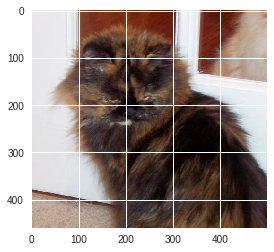

In [38]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [39]:
img.shape

(460, 499, 3)

In [40]:
img[:4,:4] #スライス

array([[[233, 231, 232],
        [233, 231, 232],
        [233, 231, 232],
        [233, 231, 232]],

       [[233, 231, 232],
        [233, 231, 232],
        [233, 231, 232],
        [233, 231, 232]],

       [[233, 231, 232],
        [233, 231, 232],
        [233, 231, 232],
        [233, 231, 232]],

       [[233, 231, 232],
        [233, 231, 232],
        [233, 231, 232],
        [233, 231, 232]]], dtype=uint8)

## 初めてのモデル: quick start

ImageNetで訓練されたモデル（120万画像と1000クラス）を再利用する。
畳み込みニューラルネットワーク（CNN）について学ぶ。


resnet34モデルを使用。

resnet34は、2015年のImageNetコンペで優勝したモデルのバージョン。
モデルの詳細はこちら[resnet models](https://github.com/KaimingHe/deep-residual-networks)。

後ほど深く解説するので、今は効果的に使用することに焦点を当てる。

犬と猫のモデルを3行のコードで20秒以下でトレーニングして評価する。





In [0]:
# Uncomment the below if you need to reset your precomputed activations
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [42]:
arch=resnet34
#データを読み込む
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
#事前学習モデルを使用
learn = ConvLearner.pretrained(arch, data, precompute=True)
#訓練
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 29439051.05it/s]


100%|██████████| 32/32 [00:14<00:00,  2.18it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.046357   0.024825   0.9905    
    1      0.039556   0.025231   0.9895    



[0.02523085305094719, 0.9895]

深層学習以前の最先端技術は80％の精度だったが、98.9％の精度への大きな飛躍をした。accuracyが精度。


同じ条件で何度か訓練して精度の違いを見る

In [19]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy   
    0      0.042537   0.027907   0.9895    
    1      0.038139   0.026198   0.989     
    2      0.036998   0.026104   0.9885    
    3      0.036812   0.026542   0.989     
    4      0.028534   0.027045   0.9875    



[0.027044846683740617, 0.9875]

In [38]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy   
    0      0.042283   0.029835   0.9895    
    1      0.042547   0.027714   0.9895    
    2      0.032985   0.027955   0.9905    
    3      0.035426   0.028036   0.99      
    4      0.032455   0.025859   0.991     



[0.025859072849154473, 0.991]

何回かやってもあまり変化はない。98%〜99%を行き来する。

## 結果の分析：画像を見る

全体的な指標を調べるだけでなく、それぞれの指標の例を見ることもお勧め:

1. 正しいラベルを無作為抽出
2. 誤ったラベルを無作為抽出
3. 各クラスの最も正しく検知できてて高い確率のラベル
4. 各クラスの最も間違って検知されて確率の高いラベル
5. 最も不確実なラベル（確率が0.5に最も近いラベル）

In [83]:
# valデータのラベル
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [84]:
# ここから、「猫」はラベル0、「犬」はラベル1であることがわかります。
data.classes

['cats', 'dogs']

In [85]:
# これにより、検証セットの予測が得られます。 予測は対数スケールです
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [86]:
log_preds[:10]

array([[ -0.00035,  -7.96395],
       [ -0.00002, -10.94057],
       [ -0.00018,  -8.61541],
       [ -0.02229,  -3.81459],
       [ -0.00001, -11.54626],
       [ -0.00004, -10.19119],
       [ -0.00002, -10.73471],
       [ -0.00012,  -8.99872],
       [ -0.00199,  -6.22153],
       [ -0.00003, -10.56236]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # 対数確率から0または1
probs = np.exp(log_preds[:,1])        # pr(dog)  np.exp：指数関数

In [0]:
#正解あるいは不正解のデータをランダムで返す。
#predsとdata.val_yつまり正解したデータか、不正解だったデータかを指定して
#bool型のものを関数の引数にしている。
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


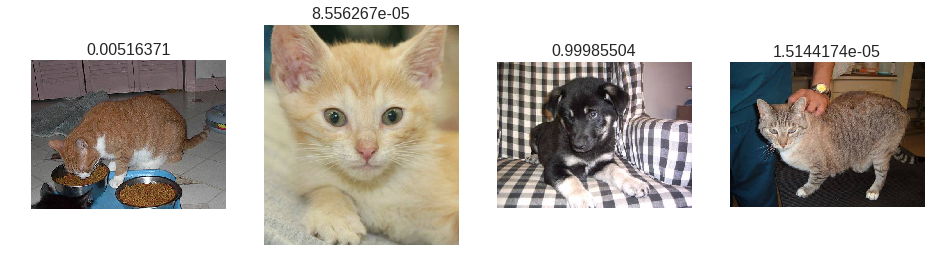

In [29]:
#犬猫分類の正しい検出をランダムで
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


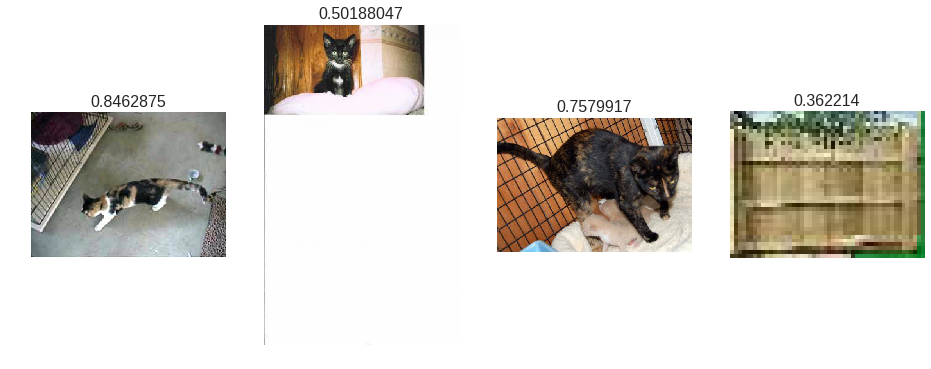

In [30]:
# 犬猫分類の誤検出をランダムで
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]] #上から4つ

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


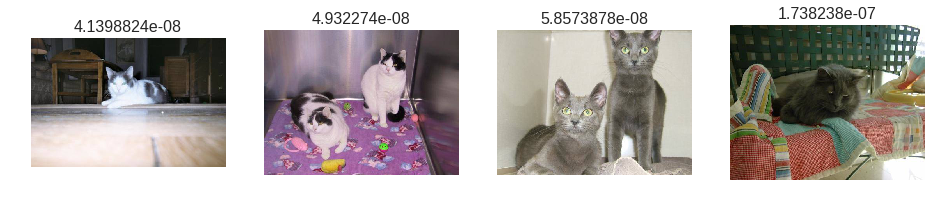

In [32]:
#猫分類の正しい検出を上から
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


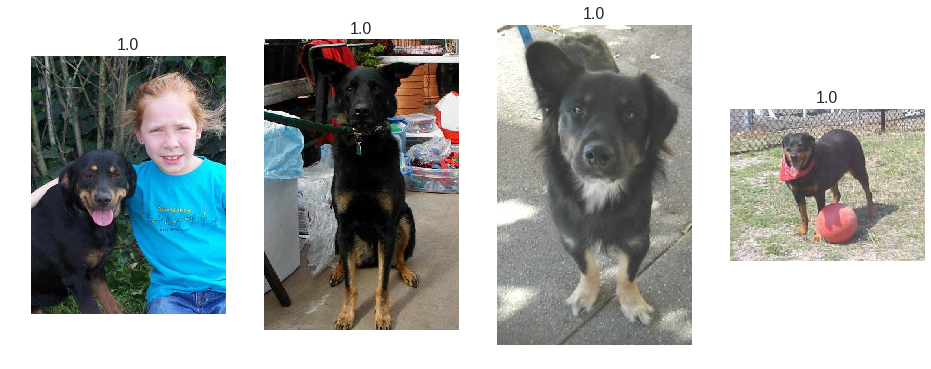

In [33]:
#犬分類の正しい検出を上から
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


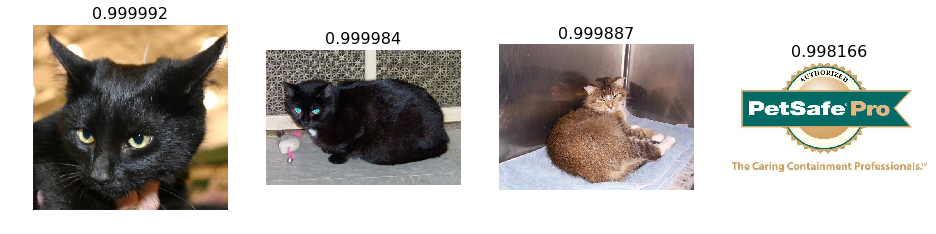

In [0]:
#猫分類の誤検出を下から
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


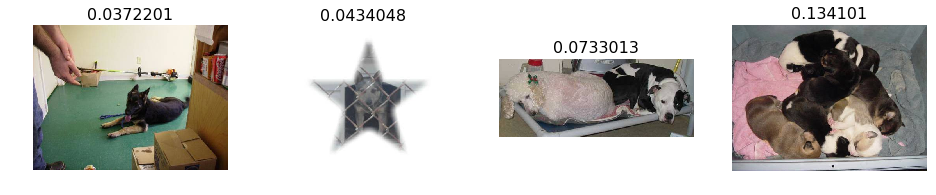

In [0]:
#犬分類の誤検出のを下から
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


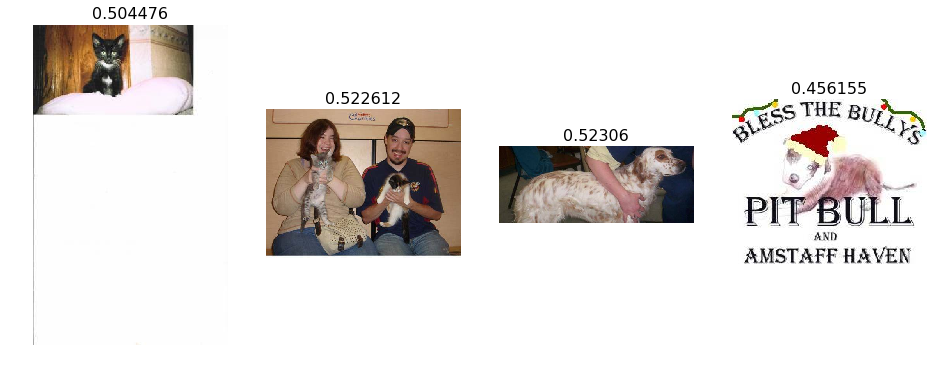

In [0]:
#不確実な予測を下から
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## 学習率の選択

学習率は、重みの更新量を決定する。

学習率はモデルのパフォーマンスに大きな影響を与えるため、設定するのが最も困難なパラメータの1つ。

learn.lr_find（）メソッドは、最適な学習率を見つけるのに役立つ。
このテクニックは2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186)を使用している。

バッチ全体の学習率をプロットすることで、これがどのように見えるかを確認できる。

新しい訓練されていないモデルの学習率を設定する方法を知りたいので、最初に新しいオブジェクトを作成。


In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [92]:
lrf=learn.lr_find()

learnオブジェクトにschedと言うプロット用の機能が組み込まれている。

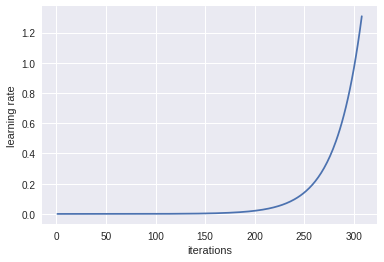

In [93]:
learn.sched.plot_lr()

上のプロットはSGDのミニバッチの1回分。



loss 対 learning rate のプロットを見ると、lossの減少がどこで止まるかを知ることができます。


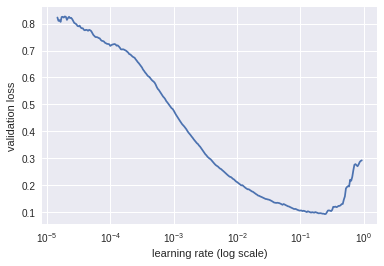

In [37]:
learn.sched.plot()

lr = 1e-2（0.01）の時にlossがもっとも改善されているので0.01を採用。
モデルを訓練するときに、最適な学習率が変わる可能性があるので、この関数を時々実行することをオススメします。


<hr>

# 是非なんか色々試してみてください。



 81%|████████▏ | 293/360 [00:04<00:01, 59.75it/s, loss=0.192]


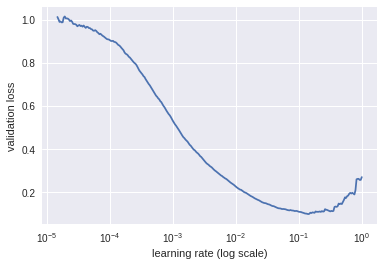

In [46]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
# learn.fit(0.001, 2)
lrf=learn.lr_find()
learn.sched.plot()

 86%|████████▌ | 308/360 [00:05<00:00, 60.65it/s, loss=0.373]


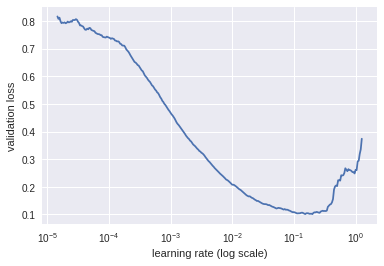

In [45]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
# learn.fit(0.01, 2)
lrf=learn.lr_find()
learn.sched.plot()

 84%|████████▎ | 301/360 [00:04<00:00, 62.09it/s, loss=0.252]


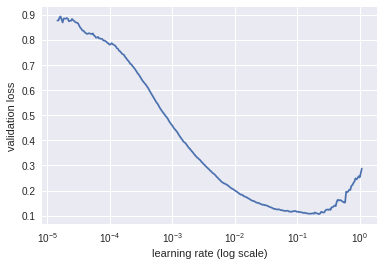

In [44]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()
learn.sched.plot()

## モデル改善

### データ拡張

エポックを増やすと、オーバーフィットの可能性がある。
データ拡張をすると抑制できる。水平反転、ズーム、回転など、画像の解釈に影響を与えないように、画像をランダムに変更する。

tfms_from_modelのaug_tfmsに引数を渡すことで拡張できる。
transforms_side_onは横反転？
max_zoomはスケール変換。



In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

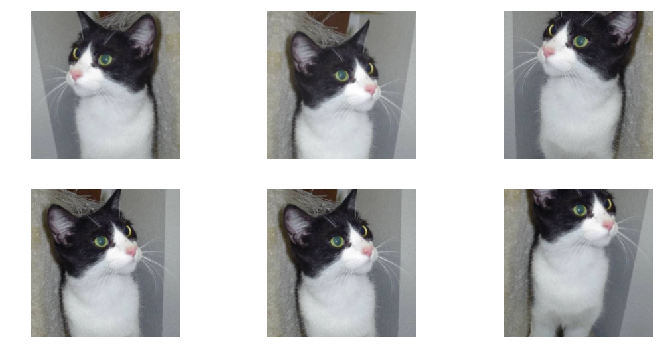

In [97]:
plots(ims, rows=2)

この拡張を変換に含む新しいデータオブジェクトを作成して訓練する。    
上で作成した変換がtfms。

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [99]:
# learn.fit(1e-2, 3)
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   accuracy   
    0      0.052297   0.028249   0.9895    
    1      0.044132   0.028637   0.988     
    2      0.042129   0.028694   0.9885    


[0.028694173514842988, 0.9885]

全体を再学習して0.98%であんまり変わりない。

最終レイヤー以外を凍結する。

In [0]:
learn.precompute=False  #precompute：事前計算

デフォルトでは、モデルを作成するときに最後のレイヤーを除くすべてのレイヤーを凍結します。つまり、フィットすると最後のレイヤーのfitしか更新されません。
    
cycle_lenの数ごとに学習率をリセット。



In [101]:
learn.fit(1e-2, 3, cycle_len=1)
# learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.051465   0.026826   0.989     
    1      0.038942   0.025368   0.989     
 32%|███▎      | 117/360 [00:58<02:00,  2.02it/s, loss=0.0394]

    2      0.035792   0.026993   0.9885    


[0.02699250078201294, 0.9885]

cycle_lenは学習率アニーリングの変形である確率的勾配降下（SGDR）と呼ばれる技法が使用され、訓練の進行に伴い徐々に学習率が低下する。
これは、最適な重みに近づくにつれて、より小さなステップを取りたい時に便利。

SGDRを時々再起動する。これによりモデルは重み空間の異なる部分にジャンプする。
「周期的なLRスケジュール」をいう。




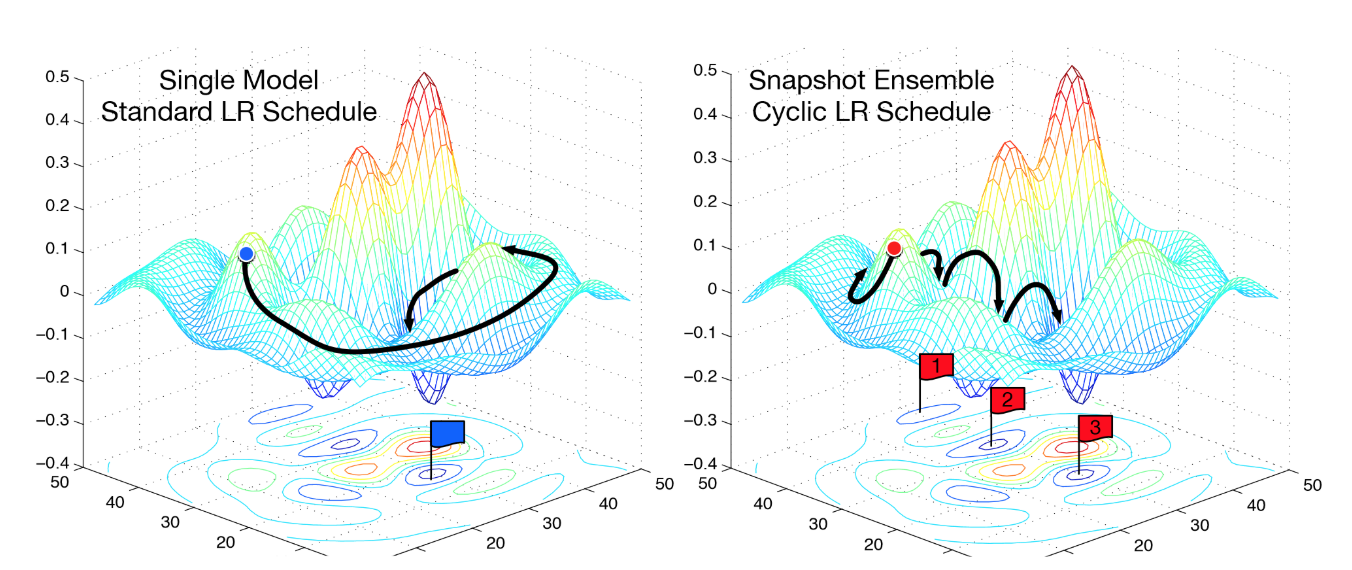

(https://arxiv.org/abs/1704.00109).


学習率をリセットする間のエポックの数はcycle_lenによって設定され、この回数はサイクル数と呼ばれ、実際にfit（）の2番目のパラメータとして渡されます。 実際の学習率は次のようになります。


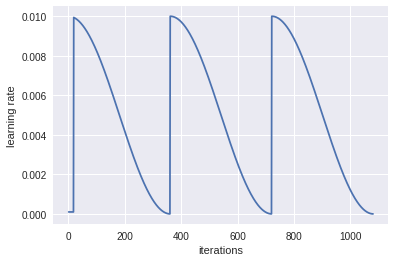

In [102]:
learn.sched.plot_lr()

検証の損失はそれほど改善されていないため、最後の層をそれ自身でさらに訓練する必要はないでしょう。


この時点ではかなり良いモデルが得られているので、保存しておき、ゼロから訓練することなく後で再ロードすることができます。

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

### ファインチューニングと微分学習率アニーリング

最終的な層を訓練したので、他の層を微調整。 全レイヤーをアンフリーズしたいことを伝えるには、unfreeze（）を呼び出します。


In [0]:
learn.unfreeze()

他のレイヤーはすでにimagenetの写真を認識するように訓練されていますが（私たちの最終レイヤーはランダムに初期化されます）、既に存在する慎重に調整されたウェイトを破壊しないように注意してください。

一般的に言えば、これまでのレイヤーはうまくいってる。 そのため、新しいデータセットの微調整は必要ないと考えています。 このため、最初のいくつかのレイヤーは1e-4、中間レイヤーは1e-3、FCレイヤーは1e-2のままにします。 私たちはこれを差別的な学習率と呼んでいますが、私たちが知っている文献にはこのテクニックの標準的な名前はありません。

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [105]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.051337   0.027485   0.987     
    1      0.038045   0.020692   0.99      
 35%|███▌      | 126/360 [02:11<04:03,  1.04s/it, loss=0.0295]

    2      0.029288   0.020458   0.9915    
    3      0.02943    0.019599   0.9905    
 87%|████████▋ | 314/360 [05:19<00:46,  1.02s/it, loss=0.0287]

    4      0.026139   0.018896   0.9905    
    5      0.022679   0.018258   0.9895    
    6      0.02097    0.01926    0.9895    


[0.019259792193770407, 0.9895]

ここで使用した別のトリックは、cycle_multパラメーターを追加することです。次の図を見て、パラメータが何をしているのか理解できるかどうかを確認してください：


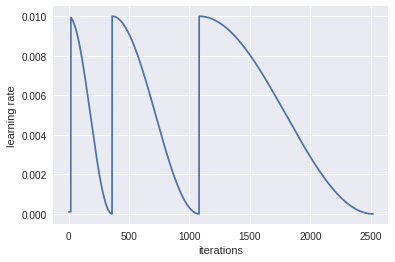

In [106]:
learn.sched.plot_lr()

上にプロットされているのは、最終層の学習率です。 初期の層の学習率は、最初に要求したのと同じ倍数の最終層速度で固定されている（すなわち、最初の層は100倍小さく、中間層は10倍小さい学習率となる。なぜなら、lr = np.array（[1e -4,1e-3,1e-2]）。

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

データの拡張には他にもできることがあります：推論時に使用します（テストとも呼ばれます）。 驚くことではありませんが、これはテスト時の増強またはTTAだけとして知られています。

TTAは、単に検証セット内の画像だけでなく、いくつかのランダムに拡張されたバージョンの予測も行います（デフォルトでは、オリジナルの画像とランダムに拡張された4つのバージョンが使用されます）。 次に、これらの画像から平均予測をとり、それを使用します。 検証セットにTTAを使用するには、学習者のTTA（）メソッドを使用できます。


In [107]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [108]:
accuracy_np(probs, y)

0.9915

この時点でTTAを使用した場合、このデータセットの誤差は通常10〜20％減少しますが、これはすばやく簡単な手法では素晴らしい結果になります。


## 結果の分析

### 混同マトリックス Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

分類モデルの結果を分析する一般的な方法は、confusion_matrixを使用することです。 Scikit-learnには、この目的に使用できる便利な機能があります。


In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

confusion_matrixを表示するだけでも、グラフビューを表示することもできます（主にカテゴリ数の多い場合に便利です）。

[[996   4]
 [  8 992]]


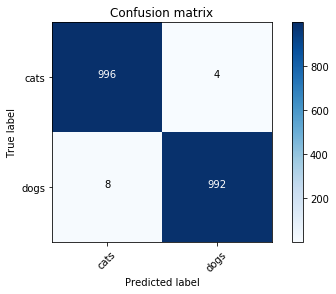

In [0]:
plot_confusion_matrix(cm, data.classes)

### 再度画像を確認する

猫と間違った例

Most incorrect cats


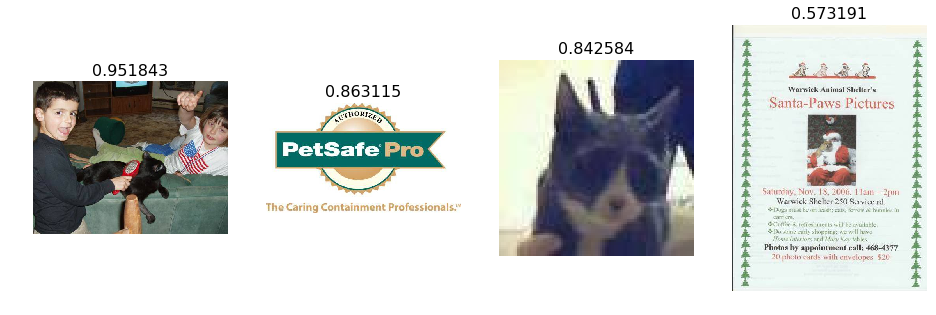

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

犬と間違った例

Most incorrect dogs


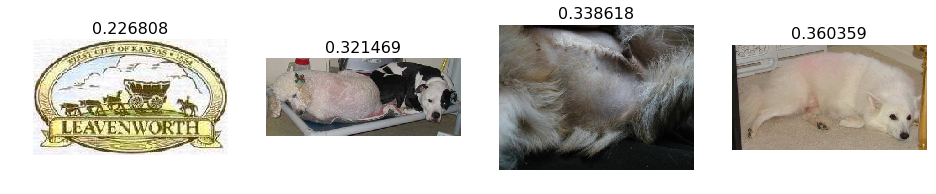

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

## レビュー：画像クラス分類を訓練する簡単なステップ

1. 事前学習モデルを使う：precompute=True
1. lossが改善される良い学習率を見つけるには `lr_find（）`を使います
1. 事前学習されたアクティベーションの最後のレイヤーを1-2エポックレーニングする
1. データ増幅（すなわち、precompute = False）して最後のレイヤーをcycle_len = 1で2〜3エポックトレーニング
1. 全レイヤーを解凍する
1. 前のレイヤーを次の上位レイヤーよりも3倍から10倍低い学習率に設定する
1. 再度lr_find()を使用する
1. オーバフィッティングするまでcycle_mult = 2で全ネットワークをトレーニングする

## 最初のモデルのコードを理解する

Dogs v Catsのコードを1行ずつ見てみましょう。


データ拡張：サイズ変更、画像クロッピング、初期正規化（（平均、標準偏差）（0,1）を持つデータの作成など）を処理。

In [0]:
tfms = tfms_from_model(resnet34, sz)

PATHは一時的なデータと最終結果を保存する。from_pathsは保存されたデータを読み込む。


In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

事前学習されたモデルを読み込む。最終レイヤーを置き換える。1000クラス分類だったのを２クラス分類に変更する。


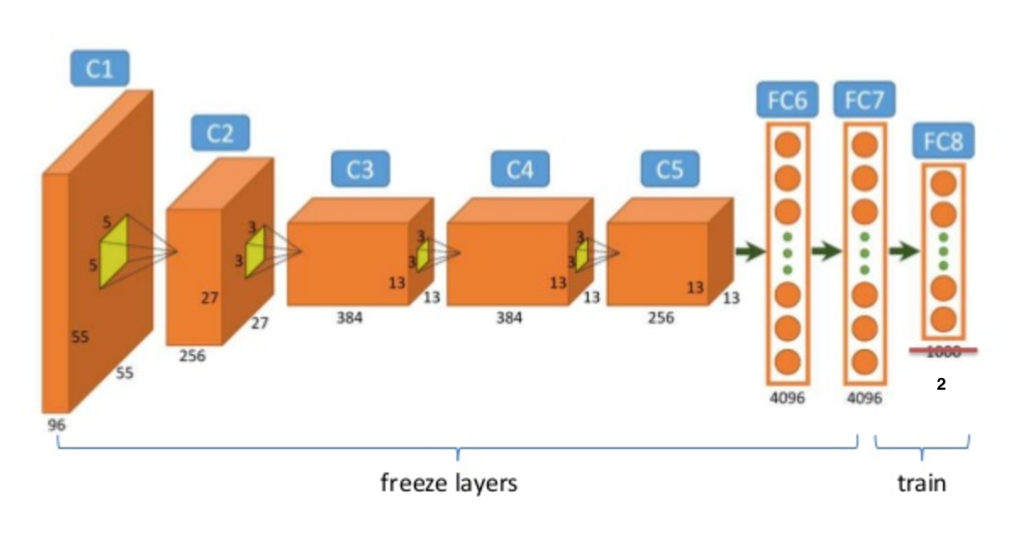

In [0]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

- ハイパーパラメータ

パラメータはモデルにデータを当てはめることによって学習されます。ハイパーパラメータの2つの例は、学習率とエポック数です。

- １エポックの中身    

ニューラルネットワークの訓練中、バッチまたはミニバッチは、確率的勾配（SGD）の1回の反復で使用されるトレーニングサンプルのサブセットです。エポックは、SGDの複数の反復で構成されるトレーニングセット全体の1回のパスです。

- 訓練

勾配降下を使用してモデルをfitすることでクラス分類器を作れる。学習率とエポックを指定する必要がある。

- 学習率とエポック数

学習率（一般に1e-2または1e-3が良い出発点です。これについては次に詳しく見ていきます？）とエポックの数です（より高い数値を渡してあなたがそれがもはや改善されていないことを見たときにトレーニングをして、見つかったエポックの数でうまくやり直してください。）


In [46]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.048756   0.032477   0.9895    



[0.032476730719208716, 0.9895]

## 結果の分析:loss と accuracy

ここで、0.03はトレーニングセットの損失の値、0.0226は検証セットの損失の値、0.9927は検証精度です。 

正解率は、予測の総数に対する正しい予測の比率です。

機械学習において、損失関数またはコスト関数は、予測の不正確さに対して支払われた価格を表す。

バイナリ分類における1つの例に関連する損失は、 - （y * log（p）+（1-y）* log（1-p））によって与えられる。
ここで、yはxの真のラベルであり、pは 私たちのモデルは、ラベルは1です。

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [48]:
#例
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

上記のおもちゃの例では、精度は100％であり、損失は0.16です。 
それを猫や犬を予測しながら我々が得ている0.03の損失と比較してください。



例：バイナリ分類の問題の1つの例として、損失を計算する方法の例を次に示します。 

- 画像xがラベル1であり、モデルが0.9の予測を与えると仮定
    
この場合、我々のモデルはラベル1を高い確率で予測しているので、損失は小さくすべきである。

loss = -log（0.9）= 0.10

- xがラベル0を持っていて、私たちのモデルが0.9を予測していると仮定    

この場合、私たちの損失はもっと大きくなるはずです。

loss = -log（1 - 0.9）= 2.30

